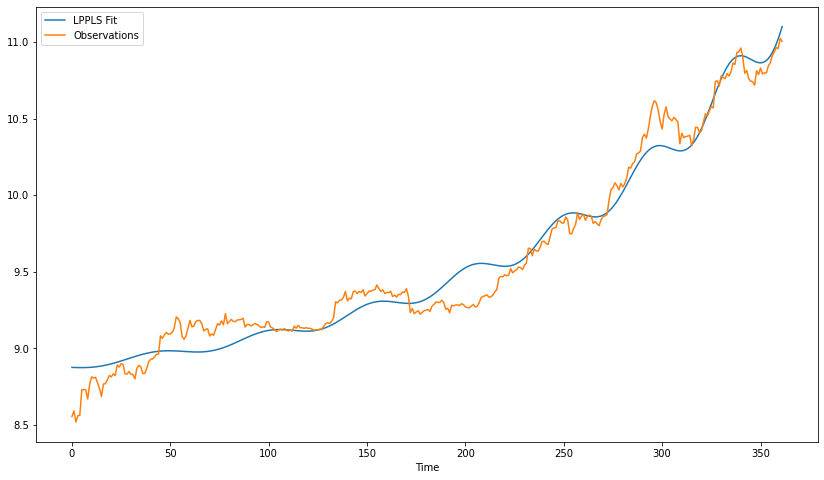

In [1]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
%matplotlib inline

# read example dataset into df 
data = data_loader.btc()

# convert index col to evenly spaced numbers over a specified interval
time = np.linspace(0, len(data)-1, len(data))

# create list of observation data, in this case, 
# daily adjusted close prices of the S&P 500
# use log price
price = np.log(data['Adj Close'].values)

# create Mx2 matrix (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the S&P 500 dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, MAX_SEARCHES, minimizer='Nelder-Mead')

# visualize the fit
lppls_model.plot_fit()

# should give a plot like the following...

/home/dominique/workspace/projects/lppls/lppls/lppls.py:262: RuntimeWarning: divide by zero encountered in log
  O_in_range = ((w / (2 * np.pi)) * np.log(abs(tc / (tc - last)))) > O_min
/home/dominique/workspace/projects/lppls/lppls/lppls.py:262: RuntimeWarning: invalid value encountered in double_scalars
  O_in_range = ((w / (2 * np.pi)) * np.log(abs(tc / (tc - last)))) > O_min


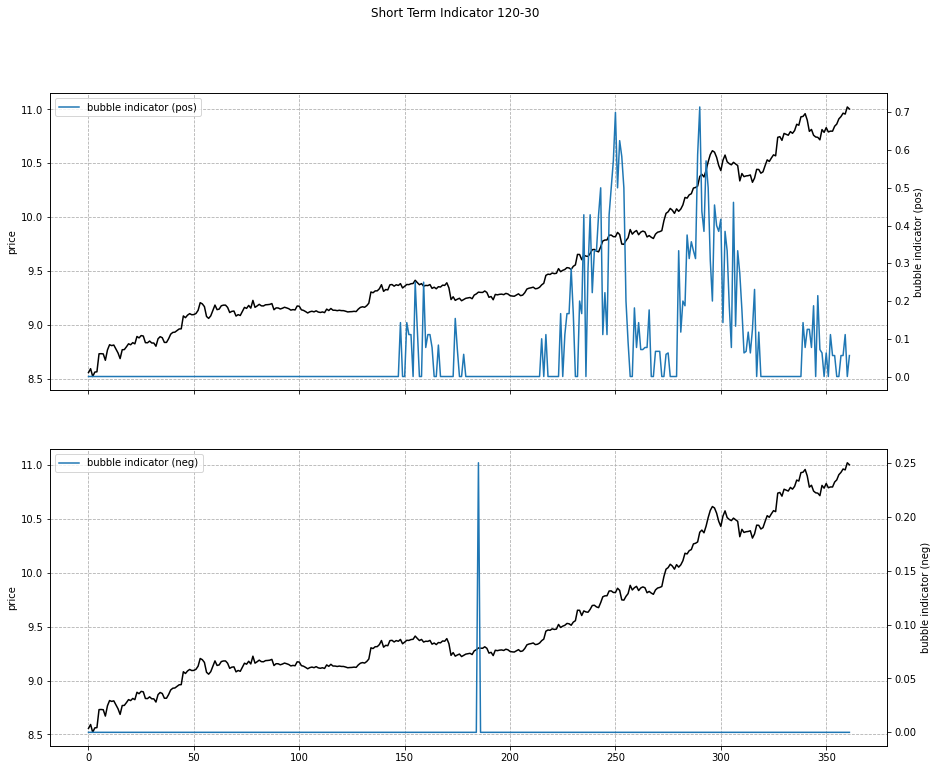

In [2]:
# define custom filter condition
filter_conditions_config = [
  {'condition_1':[
      (0.0, 0.1), # tc_range
      (0,1), # m_range
      (4,25), # w_range
      2.5, # O_min
      0.5, # D_min
  ]},
]

# compute the confidence indicator
res = lppls_model.mp_compute_indicator(
    workers=4, 
    window_size=120, 
    smallest_window_size=30, 
    increment=5, 
    max_searches=25,
    filter_conditions_config=filter_conditions_config
)

lppls_model.plot_confidence_indicators(res, condition_name='condition_1', title='Short Term Indicator 120-30')

# should give a plot like the following...